# Entanglement Tutorial:

Importing all required libraries at in the first cell is usually a best practice!!
note: we can just ignore (if any) numpy deprecation warnings on during a first run of imports in a kernel. 

In [2]:
# Diable warnings:
import warnings
warresultfilterwarnings(action='ignore')

from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from matplotlib import style
style.use('grayscale') # suitable for both JupyterLab themes

#### Let's build a 2 quibit quantum circuit using a 2 qubit qunatum register and a 2 bit classical register
size: number of bit/qubits

name: name register/circuit

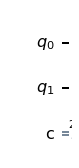

In [3]:
n = 2 # no of cbits and qubits

c_reg = ClassicalRegister(size=n, name='c')
q_reg = QuantumRegister(size=n, name='q')

q_circuit = QuantumCircuit(q_reg, c_reg)

q_circuit.draw('mpl')

## Let's create an entanglement
First we need to add a Hadamard gate to our first qubit. If there are n qubits in a register, we can access them usign their indeces starting from 0
e.i: first qubit of `q_reg` would be `q_reg[0]`


Hadamard gate creates superposition (used to change states between X and Z bases) i.e: `H|0> = |+>` and `H|1> = |->` also, `H|+> =|0>` and `H|-> =|1>` 


Then, we need to apply a Controlled Not (CNOT) beween q0 and q1, controlled on a first qubit of q_reg (q0) i.e: q_reg[0]

Note: Try out `print(help(QuantumCircuit().cx))` and  `print(help(QuantumCircuit().cnot))`

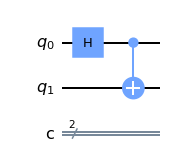

In [4]:
q_circuit.h(qubit=q_reg[0])
q_circuit.cx(control_qubit=q_reg[0], target_qubit=q_reg[1])

q_circuit.draw('mpl')

We have created an entanglement between q0 and q1. Now, let's measure q0 and q1 and store them into our classical bits. We can do this by measuring our quantum circuit. 

i.e: measuring q_reg and store in c_reg

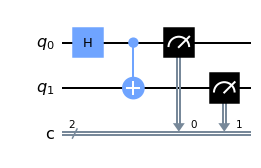

In [5]:
q_circuit.measure(qubit=q_reg, cbit=c_reg)

q_circuit.draw('mpl')

## Let's run our q_circuit

### Simulate circuit:
Qiskit Aer is used to simulate the quantum computer on a classical computer. Let's first run our q_circuit on the Aer simlulator! 

We will use the QASM simulator to simulate the quantum computer. QASM stands for Quantum Assembly Language.

-Qiskit Aer currently includes following three high performance simulator backends:

- `QasmSimulator`: Allows ideal and noisy multi-shot execution of qiskit circuits and returns counts or memory. backend_name='qasm_simulator'

- `StatevectorSimulator`: Allows ideal single-shot execution of qiskit circuits and returns the final statevector of the simulator after application. backend_name='statevector_simulator'

- `UnitarySimulator`: Allows ideal single-shot execution of qiskit circuits and returns the final unitary matrix of the circuit itself. Note that the circuit cannot contain measure or reset operations for this backend. backend_name='unitary_simulator'

Try out: print(Aer.backends())

Reference: https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html

In [6]:
qasm_simulator = Aer.get_backend(name='qasm_simulator')

result = execute(experiments=q_circuit, backend=qasm_simulator).result()

Let's visualize results.

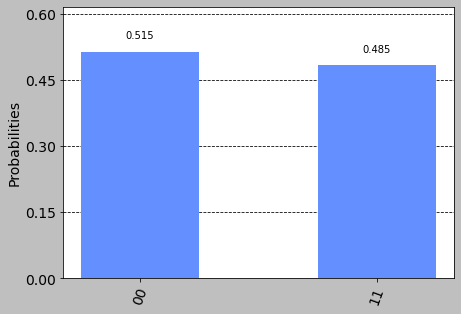

In [7]:
plot_histogram(data=result.get_counts(q_circuit))

### Send the circuit to a real quantum device at IBM
Now we run our circuit on the IBMQ!

In [8]:
# set IBMQ token if you have not set previously in your machine
# from qiskit import IBMQ
# IBMQ.save_account('your_token', overwrite=True)

# load account
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
provider = IBMQ.get_provider('ibm-q')
q_comp = provider.get_backend(name='ibmq_quito') # we can see our available access at https://quantum-computing.ibm.com/?system

job = execute(experiments=q_circuit, backend=q_comp)

In [10]:
job_monitor(job)

Job Status: job has successfully run


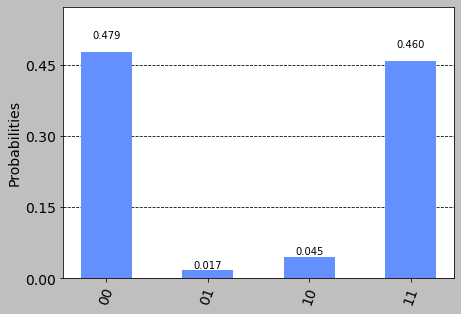

In [11]:
result = job.result()

plot_histogram(data=result.get_counts(q_circuit))